In [12]:
# Cell 1: Setup and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import numpy as np
pd.set_option('display.max_colwidth', 200)
sns.set(style='whitegrid')


# Load the bot tweets data
output_file = '../data/labeled_tweets.csv'

df = pd.read_csv(output_file)


# Basic cleanup
df.dropna(subset=['text'], inplace=True)
df['topic_label'] = df['topic_label'].fillna('').astype(str)

print("Data loaded. Shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded. Shape: (812048, 3)


,text,cluster_id,topic_label
0,they traded her freedom for a real supervillain his stories are the basis for the nick cage movie lord of war also viktor bout is from its going to get bumpy lets cue the song contract on the worl...,-1,
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure
2,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure
3,they traded her freedom for a real supervillain his stories are the basis for the nick cage movie lord of war also viktor bout is from its going to get bumpy lets cue the song contract on the worl...,-1,
4,sacrificio estremo degli ucraini attacchi suicidi imposti dai comandi russi carneficine spaventose il fronte di oggi come la grande guerra oltre 100 anni dopo bbc news ukraine war bakhmut defender...,4154,1. Russia-Ukraine War\n2. Vladimir Putin\n3. Xi Jinping Meeting\n4. Disinformation\n5. European Union\n\nHere's a possible summary of the topic:\n\nThe


In [13]:
# Define the exact topic_label to remove
topic_to_remove = '''1. Russia-Ukraine War
2. Vladimir Putin
3. Xi Jinping Meeting
4. Disinformation
5. European Union

Here's a possible summary of the topic:

The'''

# Count rows before removal
rows_before = len(df)
print(f"Rows before removal: {rows_before}")

# Remove rows with that topic_label
df = df[df['topic_label'] != topic_to_remove]

# Count rows after removal
rows_after = len(df)
print(f"Rows after removal: {rows_after}")

# Number of rows removed
print(f"Rows removed: {rows_before - rows_after}")

Rows before removal: 812048
Rows after removal: 799640
Rows removed: 12408


In [14]:
# Cell 2: Sentiment Analysis
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

def get_sentiment_category(score):
    if score > 0.2:
        return 'Strong Positive'
    elif score > 0.05:
        return 'Positive'
    elif score < -0.2:
        return 'Strong Negative'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(get_sentiment_category)
df[['text', 'sentiment', 'subjectivity', 'sentiment_category']].head()


,text,sentiment,subjectivity,sentiment_category
0,they traded her freedom for a real supervillain his stories are the basis for the nick cage movie lord of war also viktor bout is from its going to get bumpy lets cue the song contract on the worl...,0.35,0.45,Strong Positive
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,0.00,0.00,Neutral
2,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,0.00,0.00,Neutral
3,they traded her freedom for a real supervillain his stories are the basis for the nick cage movie lord of war also viktor bout is from its going to get bumpy lets cue the song contract on the worl...,0.35,0.45,Strong Positive
7,come sotto stalin bbc news vladimir karamurza russian opposition figure jailed for 25 years,0.00,0.00,Neutral


In [15]:
# Cell 3: Topic Label Processing
# Explode topic_label if multiple topics per tweet
df['topic_list'] = df['topic_label'].str.split("*")
df = df.explode('topic_list')
df['topic_list'] = df['topic_list'].str.strip()
df = df[df['topic_list'] != '']
df.head()


,text,cluster_id,topic_label,sentiment,subjectivity,sentiment_category,topic_list
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure,0.0,0.0,Neutral,Iran Sanctions
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure,0.0,0.0,Neutral,Human Rights Violations
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure,0.0,0.0,Neutral,International Community
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure,0.0,0.0,Neutral,Terrorist Organization
1,its not the weapons its avoiding the sanctions and the plot twist isviktor bout is from,5673,* Iran Sanctions\n* Human Rights Violations\n* International Community\n* Terrorist Organization\n* Economic Pressure,0.0,0.0,Neutral,Economic Pressure


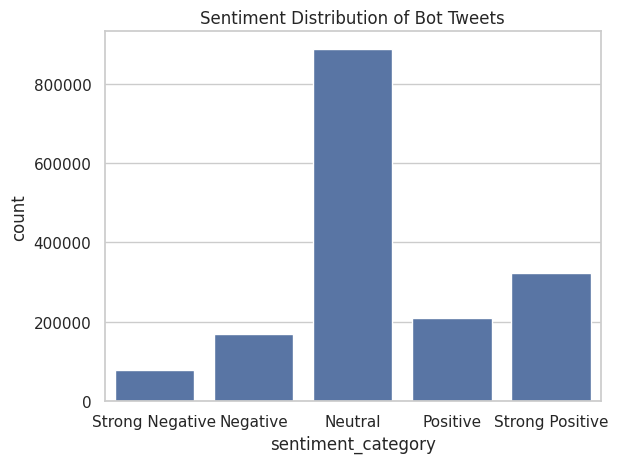

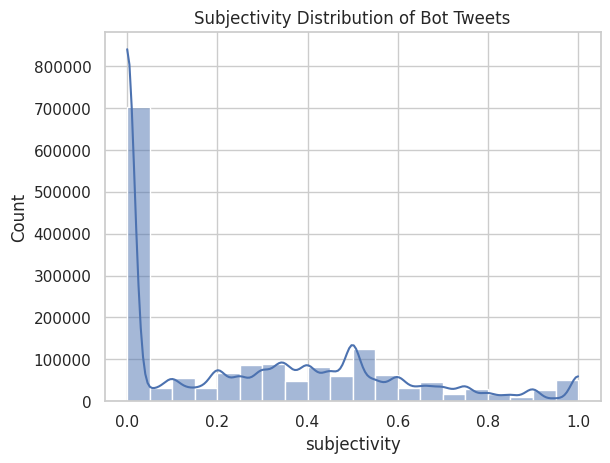

In [16]:
# Cell 4: General Sentiment Distribution
sns.countplot(data=df, x='sentiment_category', order=['Strong Negative','Negative','Neutral','Positive','Strong Positive'])
plt.title("Sentiment Distribution of Bot Tweets")
plt.show()

# Subjectivity distribution
sns.histplot(df['subjectivity'], bins=20, kde=True)
plt.title("Subjectivity Distribution of Bot Tweets")
plt.show()


<ipython-input-17-921815350>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=topic_df, x='topic_list', y='sentiment', ci='sd')


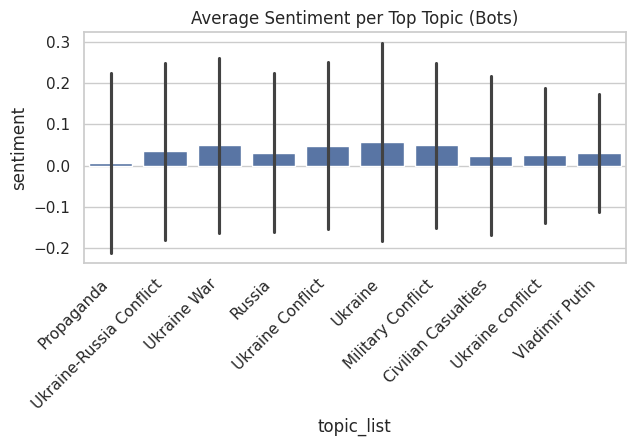

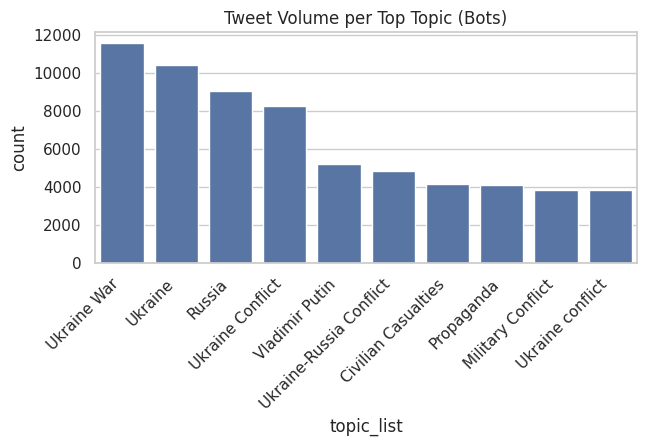

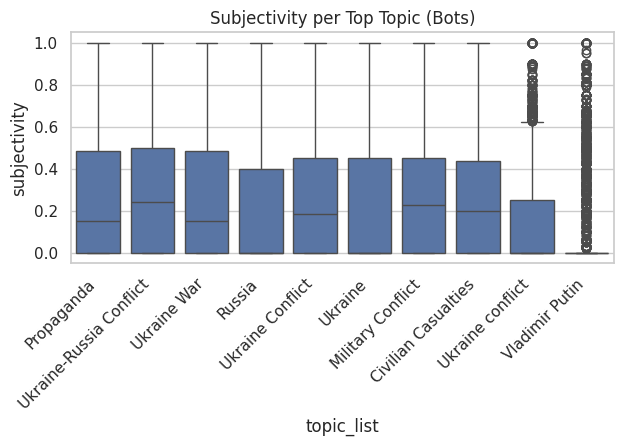

In [17]:
# Cell 5: Topic-Level Analysis
# Top topics by count
top_topics = df['topic_list'].value_counts().head(10).index
topic_df = df[df['topic_list'].isin(top_topics)]

# Sentiment by topic
plt.figure(figsize=(7,3))
sns.barplot(data=topic_df, x='topic_list', y='sentiment', ci='sd')
plt.title("Average Sentiment per Top Topic (Bots)")
plt.xticks(rotation=45, ha='right')
plt.show()

# Volume by topic
plt.figure(figsize=(7,3))
sns.countplot(data=topic_df, x='topic_list', order=top_topics)
plt.title("Tweet Volume per Top Topic (Bots)")
plt.xticks(rotation=45, ha='right')
plt.show()

# Subjectivity by topic
plt.figure(figsize=(7,3))
sns.boxplot(data=topic_df, x='topic_list', y='subjectivity')
plt.title("Subjectivity per Top Topic (Bots)")
plt.xticks(rotation=45, ha='right')
plt.show()


In [18]:
# Cell 4.5: Display Available Topics
topic_counts = df['topic_list'].value_counts()
print("Available Topics (Top 20 by frequency):")
display(topic_counts.head(20))


Available Topics (Top 20 by frequency):


,count
topic_list,
Ukraine War,11576
Ukraine,10410
Russia,9057
Ukraine Conflict,8264
Vladimir Putin,5238
Ukraine-Russia Conflict,4847
Civilian Casualties,4175
Propaganda,4141
Military Conflict,3877


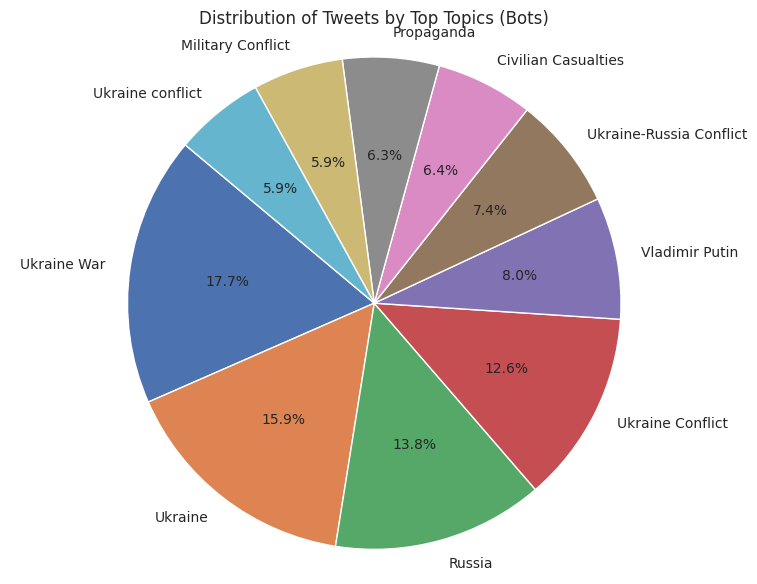

In [19]:
import matplotlib.pyplot as plt
# Pie Chart of Topic Distribution
# Count the number of tweets per topic
topic_counts = topic_df['topic_list'].value_counts()

# Plot as pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    topic_counts,
    labels=topic_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title("Distribution of Tweets by Top Topics (Bots)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

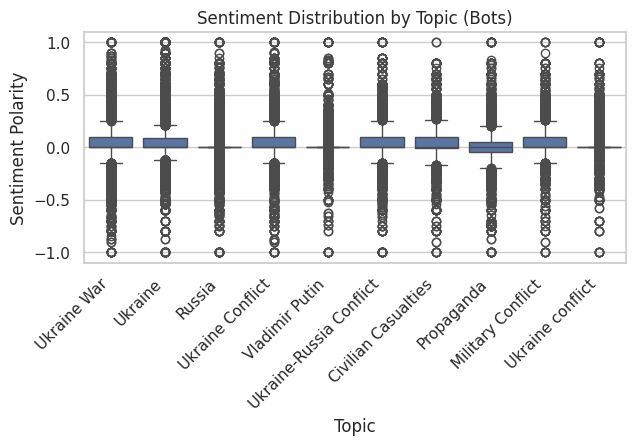

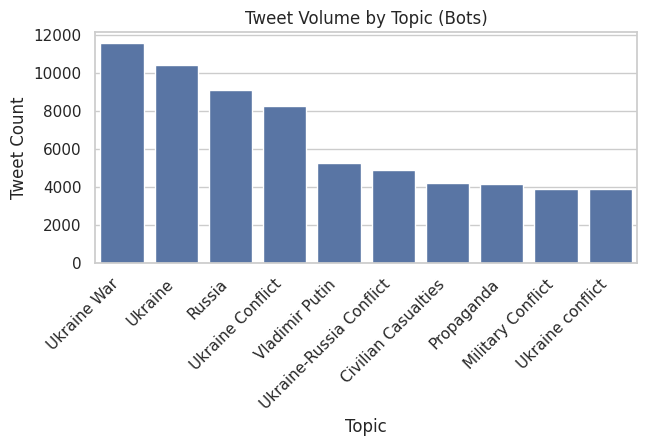

In [20]:
# Cell 6: Topic-Level Sentiment and Volume Analysis

# Get top N topics by tweet volume
top_topics = df['topic_list'].value_counts().head(10).index
topic_df = df[df['topic_list'].isin(top_topics)]

# Sentiment distribution per topic_label (boxplot)
plt.figure(figsize=(7,3))
sns.boxplot(data=topic_df, x='topic_list', y='sentiment', order=top_topics)
plt.title("Sentiment Distribution by Topic (Bots)")
plt.xlabel("Topic")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45, ha='right')
plt.show()

# Volume per topic_label (countplot)
plt.figure(figsize=(7,3))
sns.countplot(data=topic_df, x='topic_list', order=top_topics)
plt.title("Tweet Volume by Topic (Bots)")
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45, ha='right')
plt.show()


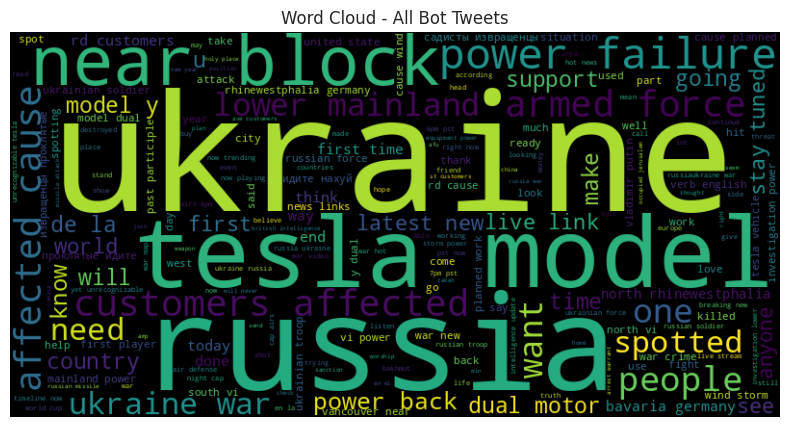

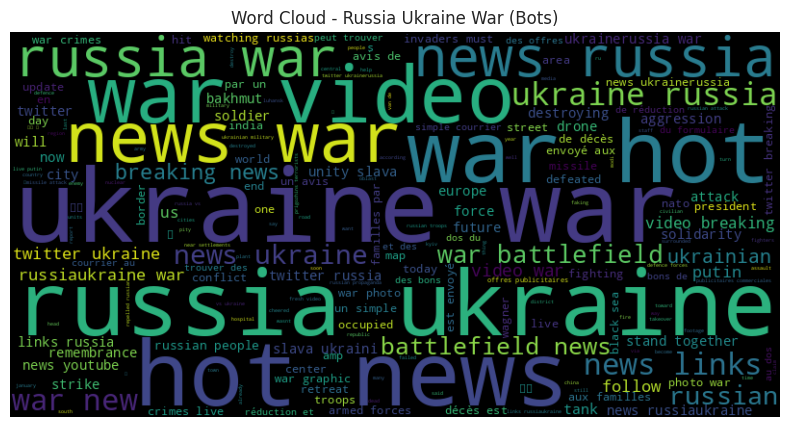

In [21]:
# Cell 7: Word Cloud by Topic
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word cloud for all bot tweets
generate_wordcloud(df['text'], 'Word Cloud - All Bot Tweets')

# Word cloud for a specific topic (e.g., "Iran Sanctions")
topic_text = df[df['topic_list']=='Russia Ukraine War']['text']
generate_wordcloud(topic_text, 'Word Cloud - Russia Ukraine War (Bots)')





In [22]:
# Cell 8: Summary Table for Reporting
summary = df.groupby('topic_list').agg({
    'sentiment': ['mean', 'std'],
    'subjectivity': ['mean', 'std'],
    'text': 'count'
})

# Flatten column MultiIndex
summary.columns = ['_'.join(col) for col in summary.columns]

# Optional: rename 'text_count' to 'tweet_count'
summary = summary.rename(columns={'text_count': 'tweet_count'})

# Sort using the correct column name
summary = summary.sort_values('tweet_count', ascending=False).head(10)

summary



,sentiment_mean,sentiment_std,subjectivity_mean,subjectivity_std,tweet_count
topic_list,,,,,
Ukraine War,0.048862,0.212568,0.255006,0.288827,11576
Ukraine,0.058008,0.239725,0.229711,0.299757,10410
Russia,0.030735,0.192646,0.200178,0.279442,9057
Ukraine Conflict,0.047864,0.202607,0.249766,0.279538,8264
Vladimir Putin,0.029868,0.142839,0.102921,0.217486,5238
Ukraine-Russia Conflict,0.035101,0.214314,0.279867,0.290546,4847
Civilian Casualties,0.024389,0.193137,0.261054,0.275798,4175
Propaganda,0.006811,0.218112,0.255196,0.285933,4141
Military Conflict,0.049112,0.199271,0.266237,0.278811,3877
